### Linearity vs Non-linearity
Tất cả các data đều không phải chỉ biểu thị xu hướng theo dạng linearity
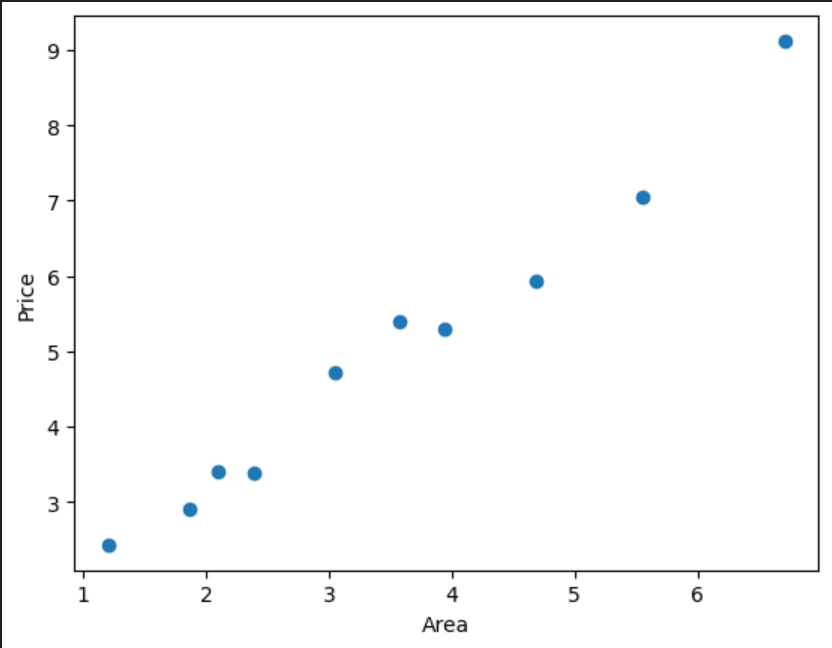
Mà có thể theo bất kỳ dạng đường cong nào khác
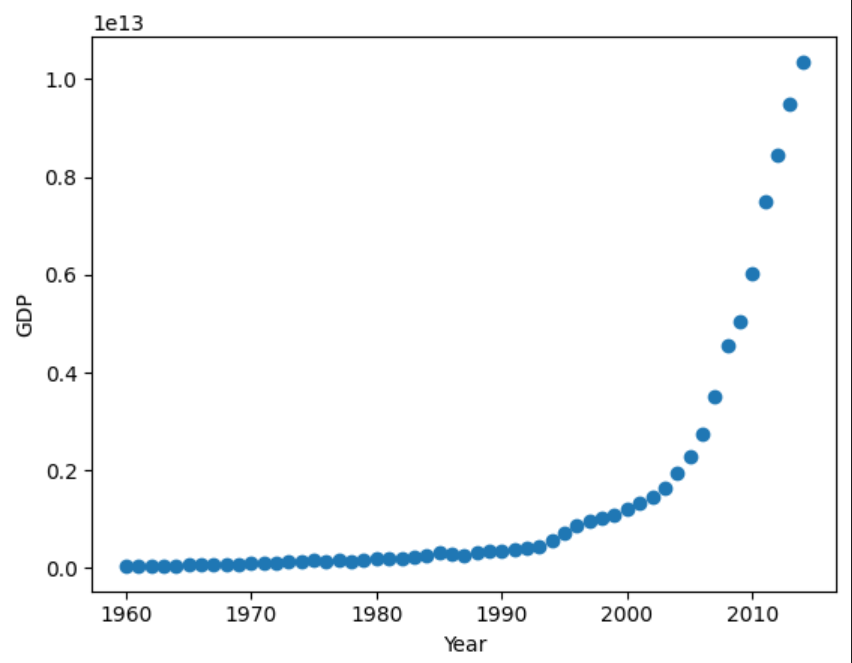

Nhiệm vụ phải xây dựng một thuật toán có thể biểu thị tất cả các phương trình nhất có thể để fit vào với xu hướng của tập dataset

### Một vài ký hiệu mới

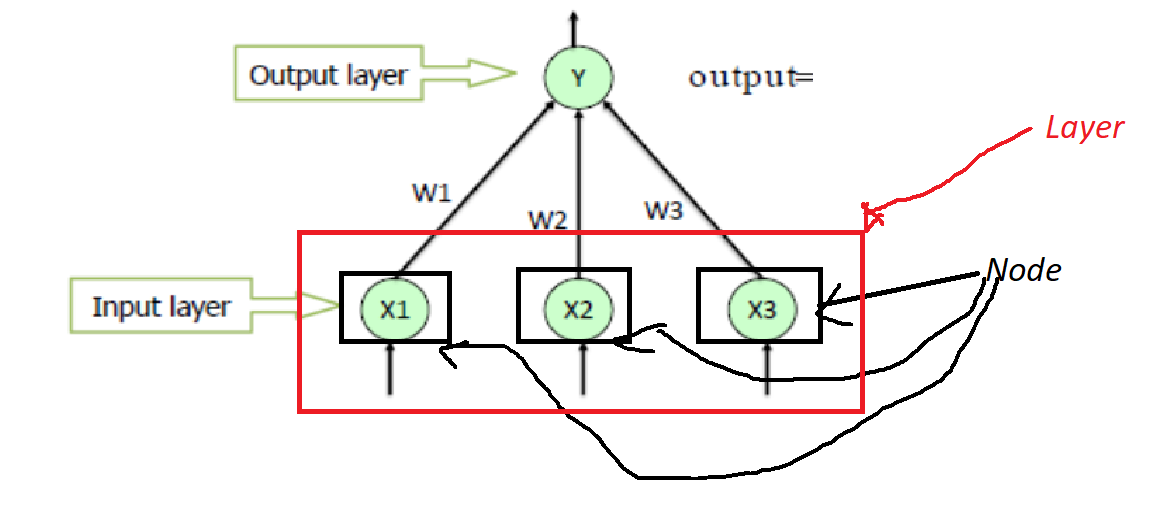

Đây là graph về linear regression mình đã học với X và W với phương trình là:
$ y = X_1.W_1 + X_2.W_2 + X_3.W_3 $ 

Tuy nhiên phương trình trên là phương trình đường thẳng, và mô hình cũng chỉ có thể giải những bài toán có data xu hướng đường thẳng


### Activation Function

Activation function là một hàm hàm số dùng trước khi đưa ra kết quả, ví dụ như phương trình trên
$$ y = X_1.W_1 + X_2.W_2 + X_3.W_3 $$
$$ y_1 = Activation(y)$$

#### **1. Sigmoid**
$$f(x) = \frac{1}{1+e^{-x}}$$

Đây là một hàm activation từng rất phổ biến, vì nó có 2 lợi ích: 
- Biến giá trị output của mình từ linear sang non-linear
- Giá trị của output nằm trong khoảng (0,1) giúp normalize output lại một khoảng nhất định

Giá trị đạo hàm của hàm này là: 
$$ f'(x) = \frac{e^{-x}}{(1+e^{-x})^2} $$
triển khai thành
$$ f'(x) = \frac{1}{1+e^{-x}}*(1-\frac{1}{1+e^{-x}})=  f(x)*(1-f(x)) $$ 
công thức được giải thích ở đây https://www.banhoituidap.com/p/33/giai-bai-toan-dao-ham-cua-ham-sigmoid-y-frac11-e-x/

Tuy nhiên giá trị đạo hàm này chỉ nằm trong khoảng [0,0.25] -> Làm cập nhật trọng số bị chậm và training lâu. Dựa vào đồ thị sau
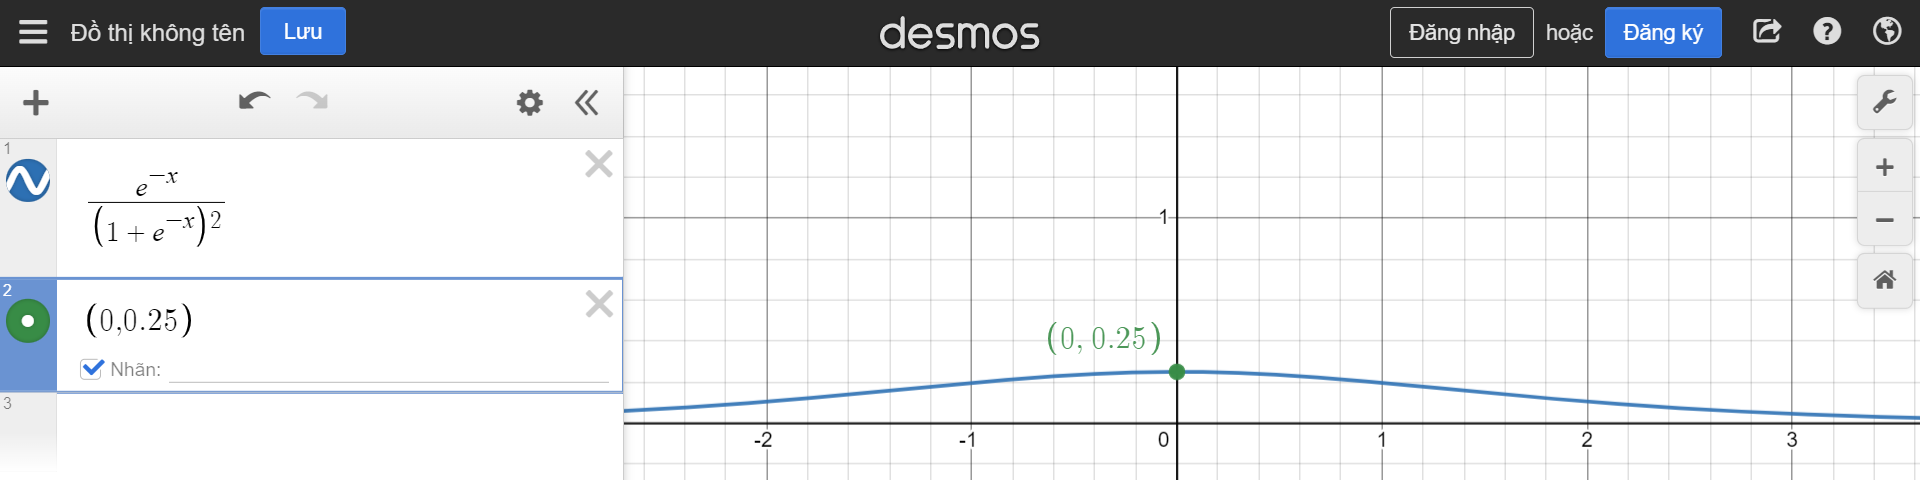


#### **2. RELU**
Cần có một hàm activation mà khắc phục được lỗi giá trị đạo hàm nhỏ, và biến mô hình thành non-linearity

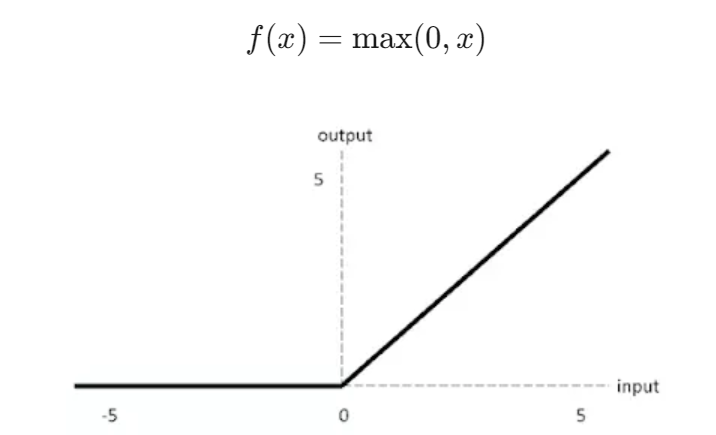

$ f'(x) = 1$  (if x>0) hoặc $ f'(x) = 0$ (if x<=0)

Điểm mạnh của RELU so với Sigmoid:
- Đơn giản hơn RELU, đạo hàm đơn giản hơn
- Vẫn giúp mô hình về hướng non-linearity
- Giá trị đạo hàm bằng 1 khi x > 0, cao hơn giá trị đạo hàm ở Sigmoid

### Các nhà khoa học đã nghĩ ra cách để giải quyết bài toán hơn bằng 2 bước:
1. Sử dụng những hàm kích hoạt toán học (activation function): sigmoid, RELU
2. Sử dụng thêm nhiều node và layer -> tăng trọng số và độ phức tạp

Theo ví dụ dưới đây:
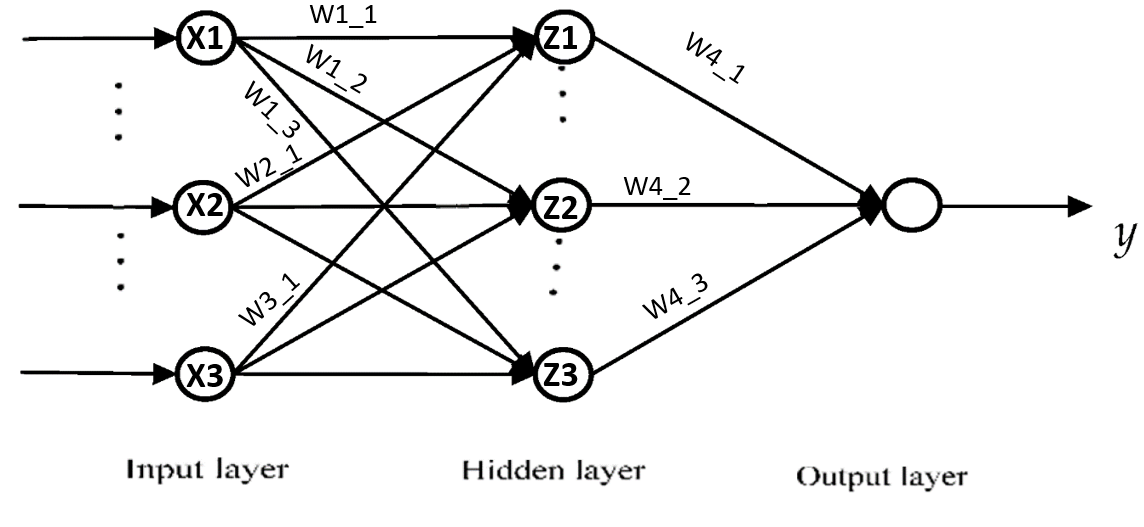

Ta có: 
- 9 trọng số ở input_layer -> hidden_layer
- 3 trọng số ở hidden_layer -> output_layer
- Hàm activation được dùng ở lớp hidden layer

=> 12 trọng số tất cả cho một bài toán gồm 3 feature và một output y

Phương trình là: 
$$ z_1 = Activation(X_1*W_{11} + X_2*W_{21} + X_3*W_{31})$$
$$ z_2 = Activation(X_1*W_{12} + X_2*W_{22} + X_3*W_{32})$$
$$ z_3 = Activation(X_1*W_{13} + X_2*W_{23} + X_3*W_{33})$$
$$ y= z_1 * W_{41} + z_2 * W_{42} + z_3 * W_{43}


### Vectorizing với nhiều node trong hidden layer

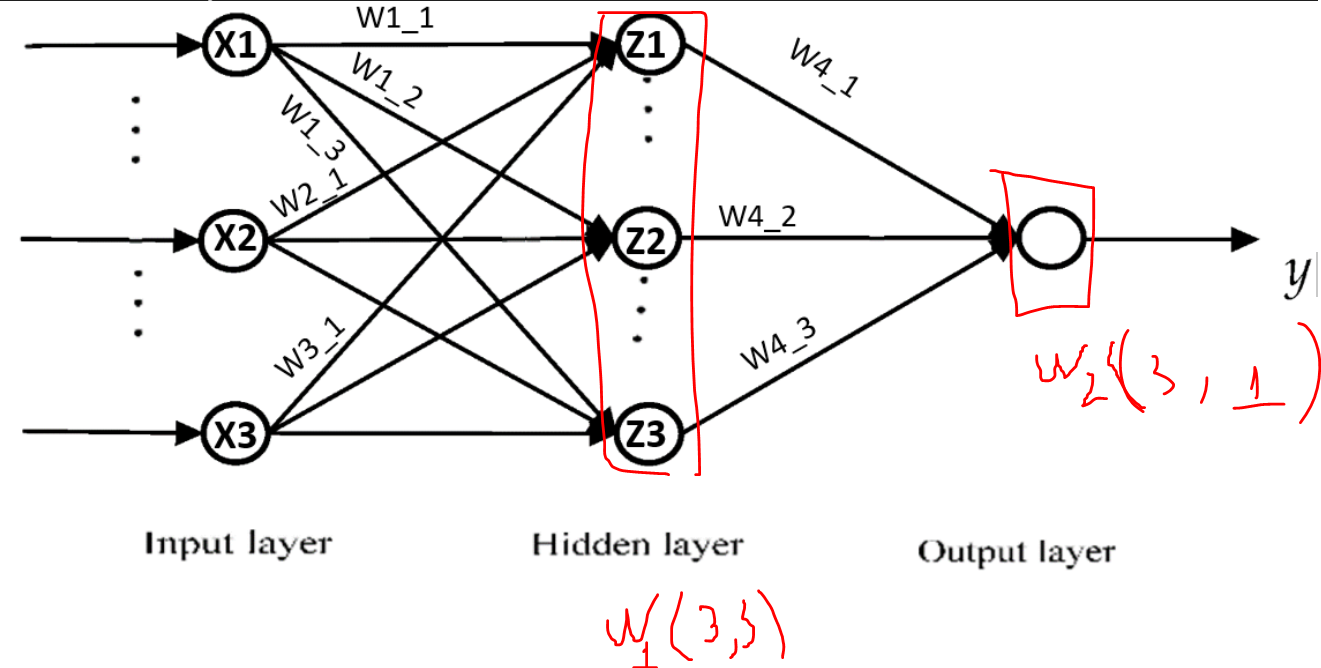

Sẽ define trọng số của từng layer có dạng: $W(n_{input\_node},n_{output\_node})$

Ví dụ như: 
- Hidden layer có input là 3 node, output ra 3 node, thì ta có ma trận $W_{1}=(3,3)$
- Output layer có input là 3 node, output ra 1 node, thì ta có ma trận $W_{2}=(3,1)$

### Giải bài toán dự đoán sales

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

data = np.genfromtxt('../advertising/advertising.csv',dtype="float64",delimiter=',')
X_train, X_test, y_train, y_test = train_test_split(data[:,:3], data[:,3], test_size=0.33, random_state=42)
X_train.shape

(12, 3)

In [18]:
import numpy as np
import random

class MLPWith1HiddenLayer:
    def __init__(self, lr=0.0001, n_epoch=1000, n_node_hidden_layer=3):
        self.lr = lr
        self.n_epoch = n_epoch
        self.n_node_hidden_layer = n_node_hidden_layer
        self.W1 = np.random.rand(3, n_node_hidden_layer) - 0.5
        self.b1 = np.zeros((1, n_node_hidden_layer))
        self.W2 = np.random.rand(n_node_hidden_layer, 1) - 0.5
        self.b2 = np.zeros((1, 1))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        x[x <= 0] = 0
        x[x > 0] = 1
        return x

    def forward(self, X):
        # Input layer to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Hidden layer to output layer
        self.y_hat = np.dot(self.a1, self.W2) + self.b2

        return self.y_hat

    def fit(self, X, Y):
        N = len(X)  # number of samples
        for i in range(self.n_epoch):
            # Forward pass
            y_hat = self.forward(X)
            # Calculate loss
            f = y_hat - Y
            loss = np.sum(f**2) / N
            print("Epoch", i+1, ", Loss", loss)

            # Backpropagation
            # Calculate gradients
            dW2 = np.dot(self.a1.T, f) / N
            db2 = np.sum(f) / N
            df1 = np.dot(f, self.W2.T)
            dz1 = df1 * self.relu_derivative(self.z1)
            dW1 = np.dot(X.T, dz1) / N
            db1 = np.sum(dz1) / N

            # Update weights and biases
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1



In [35]:
model = MLPWith1HiddenLayer(lr=0.0001,n_node_hidden_layer=3,n_epoch=100000)
model.fit(X_train,y_train.reshape(-1, 1))


Epoch 1 , Loss 220.31751299293907
Epoch 2 , Loss 147.4262852354266
Epoch 3 , Loss 116.86181727361567
Epoch 4 , Loss 90.09474266867319
Epoch 5 , Loss 71.16799059116967
Epoch 6 , Loss 59.24443131334197
Epoch 7 , Loss 52.38830552632416
Epoch 8 , Loss 49.35485471763403
Epoch 9 , Loss 47.94850457107998
Epoch 10 , Loss 47.125374104787596
Epoch 11 , Loss 46.4989036510508
Epoch 12 , Loss 45.94584012788982
Epoch 13 , Loss 45.42952616342286
Epoch 14 , Loss 44.93884801270503
Epoch 15 , Loss 44.469833326686434
Epoch 16 , Loss 44.02049331077121
Epoch 17 , Loss 43.58943102503333
Epoch 18 , Loss 43.17547106504259
Epoch 19 , Loss 42.77755868319887
Epoch 20 , Loss 42.39472877183455
Epoch 21 , Loss 42.02609289921589
Epoch 22 , Loss 41.68422420573269
Epoch 23 , Loss 41.36886194142452
Epoch 24 , Loss 41.06486097050785
Epoch 25 , Loss 40.771598680511595
Epoch 26 , Loss 40.48849765311622
Epoch 27 , Loss 40.21502150469978
Epoch 28 , Loss 39.950671268311034
Epoch 29 , Loss 39.69498218335794
Epoch 30 , Loss 39

In [46]:
## Recheck result :)

y_hat = model.forward(X_test)
print("Loss of testing data:",np.sum((y_hat-y_test.reshape(-1,1))**2)/len(y_test))
print("X is: ",X_test)
print("Predicted: ",y_hat)
print("Truth: ",y_test)

Loss of testing data: 4.235646748328779
X is:  [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [  8.6   2.1   1. ]
 [  8.7  48.9  75. ]
 [151.5  41.3  58.5]
 [ 97.5   7.6   7.2]]
Predicted:  [[21.93681886]
 [11.64189076]
 [ 4.96264126]
 [11.06897009]
 [17.82440559]
 [11.0362568 ]]
Truth:  [22.1 10.4  4.8  7.2 16.5 13.7]


 ### Vectorizing với nhiều node trong hidden layer và với nhiều hidden layer

In [ ]:
import numpy as np

class MLPWithCustomHiddenLayers:
    def __init__(self, lr=0.0001, n_epoch=1000, hidden_layer_sizes=[3]):
        self.lr = lr
        self.n_epoch = n_epoch
        self.hidden_layer_sizes = hidden_layer_sizes
        self.weights = []
        self.biases = []

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        x[x <= 0] = 0
        x[x > 0] = 1
        return x

    def initialize_weights_biases(self, input_size, output_size):
        layer_sizes = [input_size] + self.hidden_layer_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            # Initialize weights and biases for each layer
            input_dim = layer_sizes[i]
            output_dim = layer_sizes[i + 1]
            weight = np.random.rand(input_dim, output_dim) - 0.5
            bias = np.zeros((1, output_dim))
            self.weights.append(weight)
            self.biases.append(bias)

    def forward(self, X):
        a = X
        for i in range(len(self.weights) - 1):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            a = self.relu(z)
        y_hat = np.dot(a, self.weights[-1]) + self.biases[-1]
        return y_hat

    def fit(self, X, Y):
        N = len(X)  # number of samples
        input_size = X.shape[1]
        output_size = Y.shape[1]
        
        self.initialize_weights_biases(input_size, output_size)
        
        for i in range(self.n_epoch):
            # Forward pass
            y_hat = self.forward(X)
            
            # Calculate loss
            f = y_hat - Y
            loss = np.sum(f**2) / N
            print("Epoch", i+1, ", Loss", loss)
            
            # Backpropagation
            gradients = []
            for j in range(len(self.weights)):
                dW = np.dot(self.relu(self.relu_derivative(np.dot(X, self.weights[j]) + self.biases[j])).T, f) / N
                db = np.sum(f) / N
                gradients.append((dW, db))
                
                f = np.dot(f, self.weights[j].T) * self.relu_derivative(np.dot(X, self.weights[j]) + self.biases[j])
                
            # Update weights and biases
            for j in range(len(self.weights)):
                self.weights[j] -= self.lr * gradients[j][0]
                self.biases[j] -= self.lr * gradients[j][1]

### Giải bài toán GDP bằng MLP và activation function

In [ ]:
### Giải bài toán GDP bằng MLP và activation function